In [130]:
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [131]:
def sort_dicts_by_field(data, field_name, reverse=False):
    """
    按照指定字段的值对字典列表进行排序。

    参数：
        data: 字典列表
        field_name: 用于排序的字段名称
        reverse: 是否降序排列 (默认为 False，即升序排列)

    返回：
        排序后的新字典列表
    """
    return sorted(data, key=lambda item: item.get(field_name), reverse=reverse)

In [132]:
with open("test/output/bbox/eval.pkl", "rb") as f:
    result = pickle.load(f)

In [133]:
frames = result["videos"][0]["frames"]

In [134]:
frames = sort_dicts_by_field(frames, "order_in_video")

In [135]:
frames[0]

{'video_id': 'video01_00080',
 'order_in_video': 0,
 'cat_scores': {0: {'iou': np.float64(0.9774312053774487),
   'mae': np.float64(0.029376463700234192),
   'dice': np.float64(0.9885868117377851)},
  1: {'iou': nan, 'mae': nan, 'dice': nan},
  2: {'iou': np.float64(0.9954286146052952),
   'mae': np.float64(0.07733704137392662),
   'dice': np.float64(0.9977090709428315)},
  3: {'iou': np.float64(0.9855168601400939),
   'mae': np.float64(0.013351385636221702),
   'dice': np.float64(0.9927056072145949)},
  4: {'iou': np.float64(0.9962121212086907),
   'mae': np.float64(0.029391100702576112),
   'dice': np.float64(0.9981024667914471)},
  5: {'iou': nan, 'mae': nan, 'dice': nan},
  6: {'iou': nan, 'mae': nan, 'dice': nan},
  7: {'iou': nan, 'mae': nan, 'dice': nan},
  8: {'iou': nan, 'mae': nan, 'dice': nan},
  9: {'iou': nan, 'mae': nan, 'dice': nan},
  10: {'iou': np.float64(0.9955905153393232),
   'mae': np.float64(0.044750195160031224),
   'dice': np.float64(0.9977903860402308)},
  11:

In [136]:
y_iou = {cat_id: [] for cat_id in frames[0]["cat_scores"].keys()}
y_mae = {cat_id: [] for cat_id in frames[0]["cat_scores"].keys()}
y_dice = {cat_id: [] for cat_id in frames[0]["cat_scores"].keys()}
avg_iou = []
avg_mae = []
avg_dice = []

x = []

In [137]:
for frame in frames:
    x.append(frame["order_in_video"])

    for key, cat_scores in frame["cat_scores"].items():
        y_iou[key].append(cat_scores["iou"])
        y_mae[key].append(cat_scores["mae"])
        y_dice[key].append(cat_scores["dice"])

    avg_iou.append(frame["avg_scores"]["iou"])
    avg_mae.append(frame["avg_scores"]["mae"])
    avg_dice.append(frame["avg_scores"]["dice"])

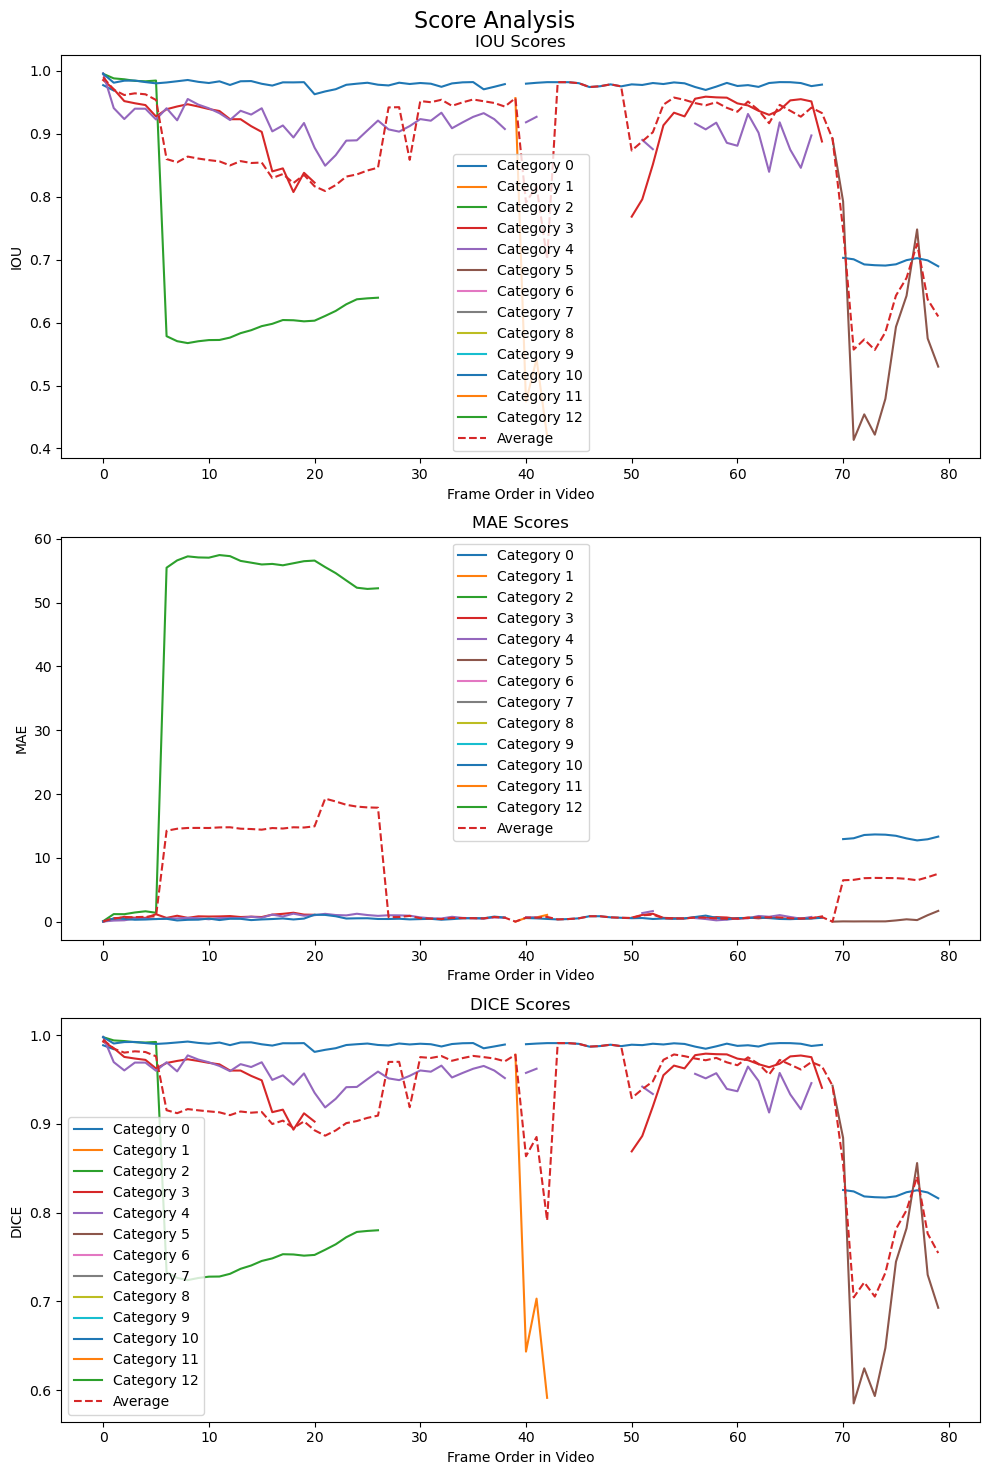

In [138]:
import matplotlib.pyplot as plt

# 假设你已经有如下的数据结构
# y_iou, y_mae, y_dice, avg_iou, avg_mae, avg_dice, x

# 创建一个包含3个子图的图表
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

plt.suptitle("Score Analysis", fontsize=16)

# 绘制IOU图
for cat_id, iou_scores in y_iou.items():
    axs[0].plot(x, iou_scores, label=f"Category {cat_id}")
axs[0].plot(x, avg_iou, label="Average", linestyle="--")
axs[0].set_title("IOU Scores")
axs[0].set_xlabel("Frame Order in Video")
axs[0].set_ylabel("IOU")
axs[0].legend()

# 绘制MAE图
for cat_id, mae_scores in y_mae.items():
    axs[1].plot(x, mae_scores, label=f"Category {cat_id}")
axs[1].plot(x, avg_mae, label="Average", linestyle="--")
axs[1].set_title("MAE Scores")
axs[1].set_xlabel("Frame Order in Video")
axs[1].set_ylabel("MAE")
axs[1].legend()

# 绘制DICE图
for cat_id, dice_scores in y_dice.items():
    axs[2].plot(x, dice_scores, label=f"Category {cat_id}")
axs[2].plot(x, avg_dice, label="Average", linestyle="--")
axs[2].set_title("DICE Scores")
axs[2].set_xlabel("Frame Order in Video")
axs[2].set_ylabel("DICE")
axs[2].legend()

# 调整子图之间的间距
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# 显示图表
plt.show()

# plt.savefig("output/points/eval.png")